# Image classification 

In image classification, we try to assign a class label to an image based on the prominent objects contained inside the image.

Example:
* Classifying images from a zoo according to the species
* Classifying images of hand-written digits to the correct digit

## What we'll be doing

Digits (MNIST) with Logistic Regression!

* Read images
* Visualise them
* Flatten the images
* Resample for machine learning
* Build Models
* Predict on new data
* Model assessment

## Get the Images

In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()

pprint(digits)

{'DESCR': 'Optical Recognition of Handwritten Digits Data Set\n'
          '===================================================\n'
          '\n'
          'Notes\n'
          '-----\n'
          'Data Set Characteristics:\n'
          '    :Number of Instances: 5620\n'
          '    :Number of Attributes: 64\n'
          '    :Attribute Information: 8x8 image of integer pixels in the '
          'range 0..16.\n'
          '    :Missing Attribute Values: None\n'
          "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
          '    :Date: July; 1998\n'
          '\n'
          'This is a copy of the test set of the UCI ML hand-written digits '
          'datasets\n'
          'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
          '\n'
          'The data set contains images of hand-written digits: 10 classes '
          'where\n'
          'each class refers to a digit.\n'
          '\n'
          'Preprocessing programs made availabl

## Visualize the Images

* The data that we are interested in is made of 8x8 images of digits.
* Let's have a look at the first 8 images, stored in the `images` attribute of the dataset.
* For these images, we know which digit they represent: it is given in the 'target' of the dataset.

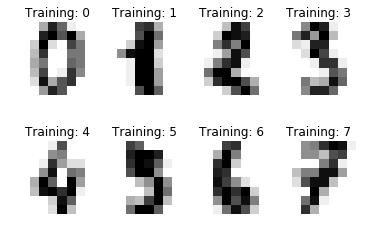

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

## Flatten the Images

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## Model Building

In [4]:
# Create a classifier: a logistic regression classifier
classifier = LogisticRegression()

In [5]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting on new data

In [6]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

## Model Assessment

In [7]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        88
          1       0.86      0.89      0.88        91
          2       0.98      0.98      0.98        86
          3       0.99      0.82      0.90        91
          4       0.99      0.93      0.96        92
          5       0.83      0.90      0.86        91
          6       0.94      0.99      0.96        91
          7       0.98      0.89      0.93        89
          8       0.89      0.88      0.88        88
          9       0.83      0.92      0.87        92

avg / total       0.92      0.92      0.92       899


Confusion matrix:
[[85  0  0  0  1  1  1  0  0  0]
 [ 0 8

In [8]:
print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Accuracy: 0.916573971079



## Visualization

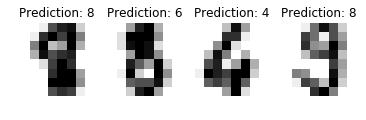

In [9]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()